<a href="https://colab.research.google.com/github/kevingst8/H8DSFT_P0_MILESTONE1/blob/main/H8DSFT_Milestone1_kevingst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

Nama    : Kevin Gusti Arswendy
Program : Data Science
Batch   : 006
Kampus  : Hacktiv8 Pondok Indah

# IDENTIFICATION OF PROBLEMS

1. Problem Topic
    Penjualan produk 'H&M'

2. Problem Statement
    Menganalisa penjualan produk dari segi popularitas, harga, brand dan warna

3. Background Topic
    Analisa berikut ini saya buat untuk melatih serta mengasah kemampuan saya yang sedang belajar menjadi Data Scientist
    di Hacktiv8 selama 12 minggu, pada kesempatan ini saya belajar menganalisa tentang penjualan produk H&M
    data yang saya dapatkan bersumber dari salah satu website Kaggle.com, berkat saya belajar di Hacktiv8 saya menjadi tau tentang dunia IT
    semoga apa yang saya kerjakan ini bisa menjadi bekal saya di masa depan.

4. Problem Description
    - Total pendapatan penjualan
    - Total pendapatan berdasarkan Kategori
    - Produk dengan warna yang memiliki penjualan tinggi
    - Analisa kinerja produk yang sedang populer
    - Outlier dengan sampel produk yang sedikit namun memiliki penjualan yang tinggi

5. Column Definition
    - Harga produk berkisar antara $12,99 hingga $149,00
    - Persentil ke 25 dari harga adalah $19,99 yang artinya 25%
      produk memiliki harga dibawah nilai ini
    - Sebagian besar produk berada dalam kisaran harga sekitar $15 hingga $80
    - Statistik Deskriptif

# PERPUSTAKAAN DATA YANG DIBUTUHKAN

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files

from PIL import Image
import IPython.display as display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# PEMUATAN DATA

In [ ]:
# Dataset yang diambil bersumber dari situs web Kaggle.com

df = pd.read_csv('hm.csv')
df.head()

,Name_of_product,category,price_of_product(in dollar),brand_name,swatches_Total,product_link,swatches_color_code,swatches_color
0,Sports Shorts,sportswear_men_clothing_shorts,12.99,H&M,3,/en_us/productpage.0995634001.html,#272628,Black
1,DryMove Sports Joggers,sportswear_men_clothing_trousersjoggers,39.99,H&M,6,/en_us/productpage.0862104002.html,#48474B,Dark gray melange
2,DryMove Sports Joggers,sportswear_men_clothing_trousersjoggers,39.99,H&M,6,/en_us/productpage.0862104009.html,#7C7D81,Light gray melange
3,DryMove Sports Hoodie,men_sport_tops,64.99,H&M,3,/en_us/productpage.1113571001.html,#272628,Black
4,Sports Shorts,sportswear_men_clothing_shorts,12.99,H&M,3,/en_us/productpage.0995634007.html,#4F4F53,Dark gray


In [ ]:
# Kolom price_of_product(in dollar) yang dikonverensi menjadi Harga dalam Dollars

df = df.rename(columns={'price_of_product(in dollar)': 'prices in dollars'})
df = df.rename(columns={'swatches_Total': 'Samples in total'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name_of_product      9146 non-null   object 
 1   category             9146 non-null   object 
 2   prices in dollars    9146 non-null   float64
 3   brand_name           9146 non-null   object 
 4   Samples in total     9146 non-null   int64  
 5   product_link         9146 non-null   object 
 6   swatches_color_code  9146 non-null   object 
 7   swatches_color       9146 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 571.8+ KB


# PEMBERSIHAN DATA

In [ ]:
# Memeriksa Nilai Null (tidak ditemukannya nilai 0)

df.isna().sum()

Name_of_product        0
category               0
prices in dollars      0
brand_name             0
Samples in total       0
product_link           0
swatches_color_code    0
swatches_color         0
dtype: int64

In [ ]:
# Menghitung total pendapatan penjualan

total_sales = round(df['prices in dollars'].sum(), 2)
print("Total Sales Revenue: $", total_sales)

Total Sales Revenue: $ 401799.92


In [ ]:
# Menghitung total pendapatan penjualan berdasarkan Kategori

category_sales = df.groupby('category')['prices in dollars'].sum()
category_sales = category_sales.sort_values(ascending=False)

category_sales

category
men_jacketscoats_jackets                      135557.17
men_sport_tops                                 85800.24
sportswear_men_clothing_trousersjoggers        71266.17
men_sport_bottoms_trousers                     22862.31
men_trousers                                   20172.31
men_tshirtstanks_shortsleeve                   18816.55
sportswear_men_clothing_hoodiessweatshirts     13447.31
sportswear_men_clothing_tops_tshirts           10754.62
ladies_accessories                              9412.31
sportswear_men_clothing_shorts                  6988.62
men_tshirtstanks_longsleeve                     6722.31
Name: prices in dollars, dtype: float64

In [ ]:
# Membuat diagram batang untuk penjualan berdasarkan Kategori

fig = go.Figure(data=[go.Bar(
    x=category_sales.index,
    y=category_sales.values,
    marker=dict(
        color=category_sales.values,
        colorscale='Viridis',
        colorbar=dict(title='Sales'),))])

fig.update_layout(
    title="Category-wise Sales",
    xaxis_title="Category",
    yaxis_title="Sales (in dollars)")

fig.show()

In [ ]:
# Grafik dibawah ini menggambarkan warna mana yang memiliki lebih banyak penjualan

color_sales = df.groupby('swatches_color')['prices in dollars'].sum().sort_values(ascending=False)
top_10_colors = color_sales.head(10)

custom_colors = ['#000000', '#000080', '#964B00', '#D3D3D3', '#000000', '#8FBC8F', '#808080',
                 '#FFFFFF', '#006400', '#A9A9A9']
bar = go.Bar(x=top_10_colors.index,
             y=top_10_colors.values,
             marker=dict(color=custom_colors))
layout_bar = go.Layout(title='Top 10 Color Sales',
                       xaxis=dict(title='Color'),
                       yaxis=dict(title='Sales'))

figure_bar = go.Figure(data=[bar], layout=layout_bar)
figure_bar.show()

In [ ]:
# Menganalisa kinerja produk

hm_df = df[df['brand_name'] == 'H&M']


product_sales = hm_df.groupby('Name_of_product')['prices in dollars'].sum()
product_sales = product_sales.sort_values(ascending=False)

print("\nProduct Performance:")
print(product_sales)


Product Performance:
Name_of_product
DryMove Sports Joggers                    53786.55
DryMove Sports Hoodie                     52446.93
Regular Fit Lightweight Outdoor Jacket    40344.62
StormMove 2.5-layer Parka                 40081.00
Sports Windbreaker                        28236.93
DryMove Reversible Track Jacket           26631.00
DryMove Sports Shirt                      24731.86
Puffer Pants with Belt                    22862.31
Padded Shell Pants                        20172.31
Regular Fit Padded Vest                   13447.31
Track Jacket                              13447.31
Regular Fit Fast-drying Track Jacket      13447.31
Running Pants                              9412.31
Padded Leg Gaiters                         9412.31
Track Pants                                8067.31
Sports Shorts                              6988.62
Running Shirt in DryMove                   6722.31
Fast-drying Sports Shirt                   6722.31
DryMove Running Shirt                      4

In [ ]:
# Grafik batang dibawah ini menggambarkan kinerja produk

fig_sales = go.Figure(data=[go.Bar(
    x=product_sales.index,
    y=product_sales.values,
    marker=dict(
        color=product_sales.values,
        colorscale='Viridis',
        colorbar=dict(title='Sales'),))])

fig_sales.update_layout(
    title="Product Performance",
    xaxis_title="Product",
    yaxis_title="Sales (in dollars)")

fig_sales.update_layout(xaxis_tickangle=-90)
fig_sales.update_layout(height=600, width=800)
fig_sales.show()

In [ ]:
# Menganalisa produk yang sedang populer

product_popularity = hm_df['Name_of_product'].value_counts()
print("\nProduct Popularity:")
print(product_popularity)


Product Popularity:
DryMove Sports Shirt                      1614
DryMove Sports Joggers                    1345
DryMove Sports Hoodie                      807
Sports Windbreaker                         807
Sports Shorts                              538
Regular Fit Lightweight Outdoor Jacket     538
Track Jacket                               269
Running Shirt in DryMove                   269
DryMove Running Shirt                      269
Fast-drying Sports Shirt                   269
DryMove Reversible Track Jacket            269
Padded Leg Gaiters                         269
Padded Shell Pants                         269
Puffer Pants with Belt                     269
Track Pants                                269
StormMove 2.5-layer Parka                  269
Running Pants                              269
Regular Fit Padded Vest                    269
Regular Fit Fast-drying Track Jacket       269
Name: Name_of_product, dtype: int64


In [ ]:
# Grafik dibawah ini menggambarkan produk yang sedang populer

fig_popularity = go.Figure(data=[go.Bar(
    x=product_popularity.index,
    y=product_popularity.values,
    marker=dict(
        color=product_popularity.values,
        colorscale='Viridis',
        colorbar=dict(title='Popularity'),))])

fig_popularity.update_layout(
    title="Product Popularity",
    xaxis_title="Product",
    yaxis_title="Popularity")

fig_popularity.update_layout(xaxis_tickangle=-90)
fig_popularity.update_layout(height=600, width=800)
fig_popularity.show()

In [ ]:
# 5 Popularitas produk teratas

top_5_products = product_popularity.head(5)

fig_popularity = px.pie(names=top_5_products.index, values=top_5_products.values, title="Top 5 Product Popularity")
fig_popularity.show()

In [ ]:
# Produk terlaris berdasarkan warna

top_products = df.groupby('swatches_color')['Name_of_product'].agg(lambda x: x.value_counts().index[0]).reset_index()

fig = px.bar(top_products, x='swatches_color', y='Name_of_product',
             labels={'swatches_color': 'Color', 'Name_of_product': 'Top-Selling Product'},
             title='Top-Selling Product by Color')

fig.update_layout(xaxis_tickangle=-90)

fig.show()

# EKSPLORASI DATA

In [ ]:
hm_df = df[df['brand_name'] == 'H&M']
samples_sales_df = hm_df[['Samples in total', 'prices in dollars']]

fig_samples_sales = px.scatter(samples_sales_df, x='Samples in total', y='prices in dollars',
                               title='Product Samples vs. Sales')
fig_samples_sales.update_layout(xaxis_title="Product Samples", yaxis_title="Sales (in dollars)")
fig_samples_sales.show()

Grafik di atas menunjukkan adanya beberapa outlier pada data dimana produk dengan jumlah sampel yang relatif sedikit memiliki penjualan yang tinggi.
Penyimpangan ini menunjukkan bahwa faktor selain jumlah sampel dapat memengaruhi kinerja penjualan.

In [ ]:
# Mencari outlier pada brand yang memiliki penjualan tinggi

hm_df = df[df['brand_name'] == 'H&M']
hm_df['sales_zscore'] = (hm_df['prices in dollars'] - hm_df['prices in dollars'].mean()) / hm_df['prices in dollars'].std()
hm_df['samples_zscore'] = (hm_df['Samples in total'] - hm_df['Samples in total'].mean()) / hm_df['Samples in total'].std()

outliers = hm_df[(hm_df['sales_zscore'] > 2) | (hm_df['sales_zscore'] < -2) | (hm_df['samples_zscore'] > 2) | (hm_df['samples_zscore'] < -2)]
outliers_products = outliers['Name_of_product'].unique()
print("Products with outliers:")
print(outliers_products)

Products with outliers:
['StormMove 2.5-layer Parka']


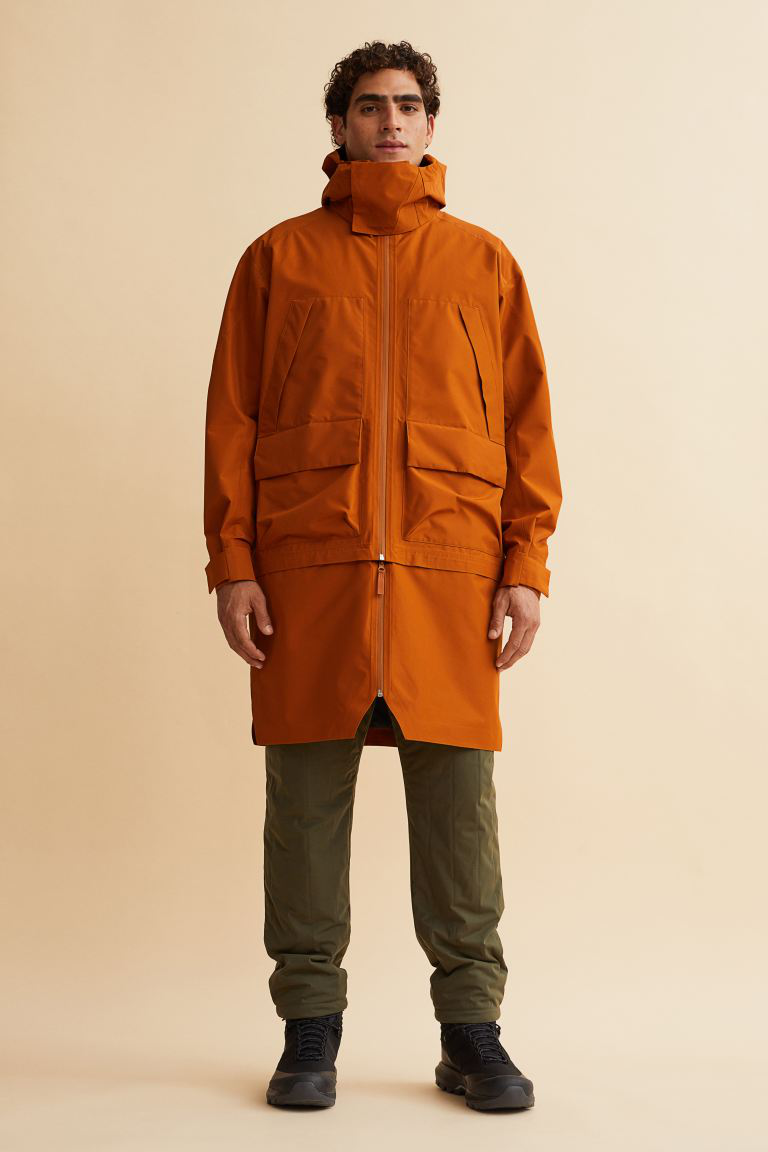

In [ ]:
# Gambar depan

image_path = "stormmove.jpeg"
image = Image.open(image_path)

display.display(image)

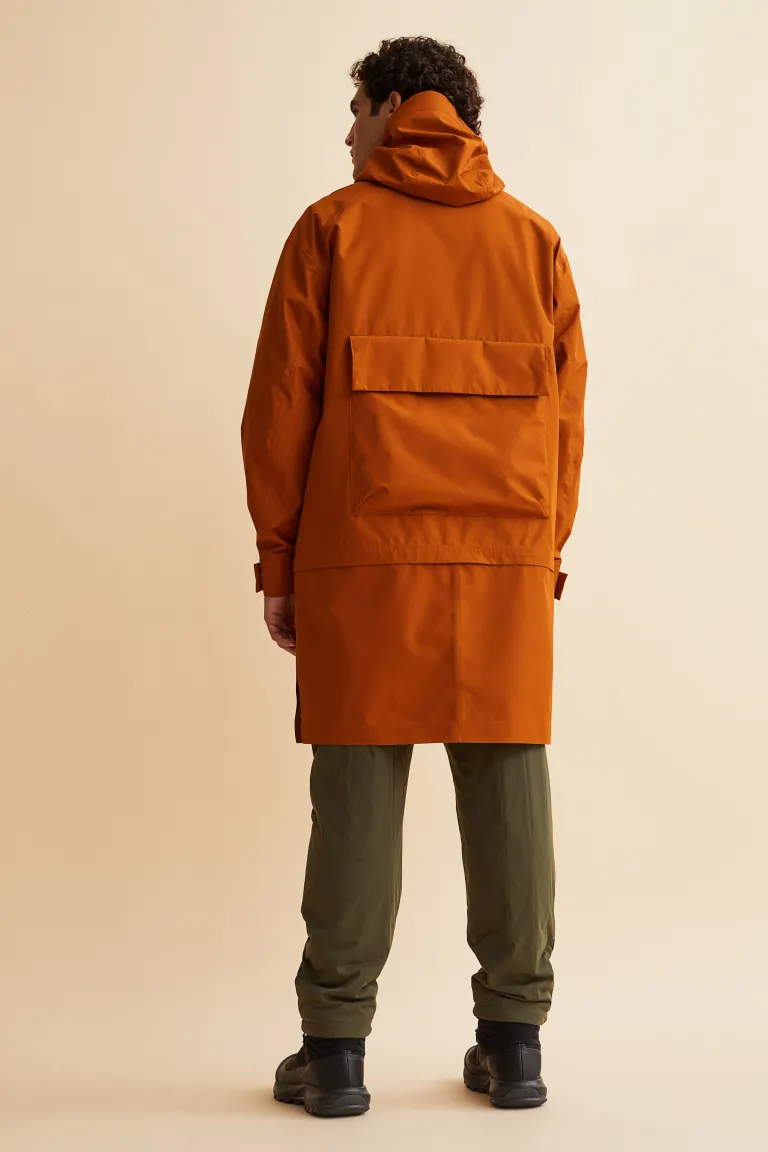

In [ ]:
# Gambar belakang

image_path = "stormmove2.jpeg"
image = Image.open(image_path)

display.display(image)

Gambar diatas adalah produk yang sampelnya sedikit namun memiliki penjualan yang tinggi.

In [ ]:
outliers.head(10)

,Name_of_product,category,prices in dollars,brand_name,Samples in total,product_link,swatches_color_code,swatches_color,sales_zscore,samples_zscore
13,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
47,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
81,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
115,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
149,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
183,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
217,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
251,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
285,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162
319,StormMove 2.5-layer Parka,men_jacketscoats_jackets,149.0,H&M,1,/en_us/productpage.1067832001.html,#845A37,Brown,3.594602,-1.276162


Menganalisa beberapa statistik dibawah ini

In [ ]:
stats = df.describe()
stats

,prices in dollars,Samples in total
count,9146.000000,9146.000000
mean,43.931765,4.558824
std,29.229448,2.788692
min,12.990000,1.000000
25%,19.990000,3.000000
50%,37.490000,4.000000
75%,64.990000,6.000000
max,149.000000,10.000000


> Harga produk berkisar antara 12,99 hingga 149,00 dolar.
> Persentil ke 25 dari harga adalah $19,99 yang artinya 25%
  produk memiliki harga dibawah nilai ini.

In [ ]:
# Membuat Histogram untuk memvisualisasikan distribusi

histogram = go.Histogram(x=df['prices in dollars'], nbinsx=10)
layout_histogram = go.Layout(
    title='Price Distribution',
    xaxis=dict(title='Prices in Dollars'),
    yaxis=dict(title='Frequency'))

figure_histogram = go.Figure(data=[histogram], layout=layout_histogram)
figure_histogram.show()

> Sebagian besar produk berada dalam kisaran harga sekitar 15 hingga 80 dolar
> Ada kemiringan ke kanan dalam distribusi, yang menunjukan bahwa jumlah produk
  yang relatif lebih sedikit dengan harga lebih tinggi.

In [ ]:
# Membuat plot kotak untuk memvisualisasikan variabilitas data

box_plot = go.Box(x=df['prices in dollars'], orientation='h')
layout_box_plot = go.Layout(title='Price Variability')

figure_box_plot = go.Figure(data=[box_plot], layout=layout_box_plot)
figure_box_plot.update_layout(xaxis_title='Price in Dollars')
figure_box_plot.show()

In [ ]:
# Menghitung statistik deskriptif

price_stats = df['prices in dollars'].describe()
sales_stats = df['Samples in total'].describe()

price_stats

count    9146.000000
mean       43.931765
std        29.229448
min        12.990000
25%        19.990000
50%        37.490000
75%        64.990000
max       149.000000
Name: prices in dollars, dtype: float64

In [ ]:
sales_stats

count    9146.000000
mean        4.558824
std         2.788692
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: Samples in total, dtype: float64

In [ ]:
# Plot Grafik Harga vs Penjualan.

scatter = go.Scatter(x=df['prices in dollars'],
                     y=df['Samples in total'],
                     mode='markers',
                     marker=dict(size=10),)
layout_scatter = go.Layout(title='Price vs. Sales',
                           xaxis=dict(title='Price'),
                           yaxis=dict(title='Sales'))

figure_scatter = go.Figure(data=[scatter], layout=layout_scatter)
figure_scatter.show()